<a href="https://colab.research.google.com/github/Shaif95/AI_Camp_Cozy_Cornbreads/blob/main/Copy_of_Word2Vec_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Natural Language Processing using NLTK

In [ ]:
# !pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web.

In [ ]:
import urllib
import bs4 as bs
import re

In [ ]:
url = 'https://en.wikipedia.org/wiki/Global_warming' # you can change this to use other sites as well.
source = urllib.request.urlopen(url).read()

len(source)


1074620

In [ ]:
soup = bs.BeautifulSoup(source,"html.parser")
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [ ]:
len(text)

56361

In [ ]:
text[100:500]


"perature—and its effects on earth's climate system. climate change in a broader sense also includes previous long-term changes to earth's climate. the current rise in global average temperature is more rapid than previous changes, and is primarily caused by humans burning fossil fuels. fossil fuel use, deforestation, and some agricultural and industrial practices increase greenhouse gases, notably"

##NLP Part 1 - Tokenization of paragraphs/sentences

---

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization".

You should also spend time on the NLTK documentation. If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!

In [ ]:
'''
TODO: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''
import nltk
from nltk import word_tokenize
words = word_tokenize(text[:500])
print(words)

['in', 'common', 'usage', ',', 'climate', 'change', 'describes', 'global', 'warming—the', 'ongoing', 'increase', 'in', 'global', 'average', 'temperature—and', 'its', 'effects', 'on', 'earth', "'s", 'climate', 'system', '.', 'climate', 'change', 'in', 'a', 'broader', 'sense', 'also', 'includes', 'previous', 'long-term', 'changes', 'to', 'earth', "'s", 'climate', '.', 'the', 'current', 'rise', 'in', 'global', 'average', 'temperature', 'is', 'more', 'rapid', 'than', 'previous', 'changes', ',', 'and', 'is', 'primarily', 'caused', 'by', 'humans', 'burning', 'fossil', 'fuels', '.', 'fossil', 'fuel', 'use', ',', 'deforestation', ',', 'and', 'some', 'agricultural', 'and', 'industrial', 'practices', 'increase', 'greenhouse', 'gases', ',', 'notably']


In [ ]:
'''
TODO: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)

In [ ]:
sentences[5]

"larger amounts of these gases trap more heat in earth's lower atmosphere, causing global warming."

##NLP Part 2 - Stopwords and Punctuation
---
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

'''
TODO: Define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''

def remove_stopwords(sentences):
    stop_words = set(stopwords.words('english'))
    filtered_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [word for word in words if word.casefold() not in stop_words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)

    return filtered_sentences

sentences = remove_stopwords(sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(sentences[0])

140

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
sentences[:10]

["common usage , climate change describes global warming—the ongoing increase global average temperature—and effects earth 's climate system .",
 "climate change broader sense also includes previous long-term changes earth 's climate .",
 'current rise global average temperature rapid previous changes , primarily caused humans burning fossil fuels .',
 'fossil fuel use , deforestation , agricultural industrial practices increase greenhouse gases , notably carbon dioxide methane .',
 'greenhouse gases absorb heat earth radiates warms sunlight .',
 "larger amounts gases trap heat earth 's lower atmosphere , causing global warming .",
 'due climate change , deserts expanding , heat waves wildfires becoming common .',
 'increased warming arctic contributed melting permafrost , glacial retreat sea ice loss .',
 'higher temperatures also causing intense storms , droughts , weather extremes .',
 'rapid environmental change mountains , coral reefs , arctic forcing many species relocate become 

In [ ]:
'''
TODO: Define a function called "remove_punctuation" that removes punctuation from the sentences.
'''
import string
def remove_punctuation(sentences):
    punctuation = string.punctuation
    filtered_sentences = []

    for sentence in sentences:
        filtered_sentence = ''.join(char for char in sentence if char not in punctuation)
        filtered_sentences.append(filtered_sentence)

    return filtered_sentences

punc_sent = remove_punctuation(sentences)

In [ ]:
import string
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

','

In [ ]:
punc_sent[:10]

['common usage  climate change describes global warming—the ongoing increase global average temperature—and effects earth s climate system ',
 'climate change broader sense also includes previous longterm changes earth s climate ',
 'current rise global average temperature rapid previous changes  primarily caused humans burning fossil fuels ',
 'fossil fuel use  deforestation  agricultural industrial practices increase greenhouse gases  notably carbon dioxide methane ',
 'greenhouse gases absorb heat earth radiates warms sunlight ',
 'larger amounts gases trap heat earth s lower atmosphere  causing global warming ',
 'due climate change  deserts expanding  heat waves wildfires becoming common ',
 'increased warming arctic contributed melting permafrost  glacial retreat sea ice loss ',
 'higher temperatures also causing intense storms  droughts  weather extremes ',
 'rapid environmental change mountains  coral reefs  arctic forcing many species relocate become extinct ']

##NLP Part 3a - Stemming the words
---
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('troubled'))
print(stemmer.stem('trouble'))
stemmer.stem('troubling')
stemmer.stem('troubles')


troubl
troubl


'troubl'

In [ ]:
  ## NLP Part 3a - Stemming the words

from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()
# try each of the words below
# print(stemmer.stem('troubled'))
# print(stemmer.stem('trouble'))
#stemmer.stem('troubling')
#stemmer.stem('troubles')

'''
TODO: Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
def stem_sentences(sentences):
    stemmer = PorterStemmer()
    stemmed_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        stemmed_words = [stemmer.stem(word) for word in words]
        stemmed_sentence = ' '.join(stemmed_words)
        stemmed_sentences.append(stemmed_sentence)

    return stemmed_sentences

stem_sent = stem_sentences(sentences)

In [ ]:
print(stem_sent[:10])
print(sentences[:10])

["common usag , climat chang describ global warming—th ongo increas global averag temperature—and effect earth 's climat system .", "climat chang broader sens also includ previou long-term chang earth 's climat .", 'current rise global averag temperatur rapid previou chang , primarili caus human burn fossil fuel .', 'fossil fuel use , deforest , agricultur industri practic increas greenhous gase , notabl carbon dioxid methan .', 'greenhous gase absorb heat earth radiat warm sunlight .', "larger amount gase trap heat earth 's lower atmospher , caus global warm .", 'due climat chang , desert expand , heat wave wildfir becom common .', 'increas warm arctic contribut melt permafrost , glacial retreat sea ice loss .', 'higher temperatur also caus intens storm , drought , weather extrem .', 'rapid environment chang mountain , coral reef , arctic forc mani speci reloc becom extinct .']
["common usage , climate change describes global warming—the ongoing increase global average temperature—and

##NLP Part 3b - Lemmatization
---
Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).

In [ ]:
## NLP Part 3b - Lemmatization

from nltk.stem import WordNetLemmatizer

## Step 1: Import the lemmatizer
wnl = WordNetLemmatizer()
print(wnl.lemmatize('broader'))
'''
TODO: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence

def lem_sentences(sentences):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_sentence = ' '.join(lemmatized_words)
        lemmatized_sentences.append(lemmatized_sentence)

    return lemmatized_sentences

lem_sent = lem_sentences(sentences)


broader


In [ ]:
lem_sent[0]

"common usage , climate change describes global warming—the ongoing increase global average temperature—and effect earth 's climate system ."

##NLP Part 4 - POS Tagging
---
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [ ]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
# all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

nltk.download('averaged_perceptron_tagger') #---> " hello world. I am here!"
all_words = nltk.word_tokenize(text) # ---> "['hello', 'world', ...]"
tagged_words = nltk.pos_tag(all_words) #----> [['hello', "NN"], ['world', "NN"], ...]
tagged_words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('in', 'IN'),
 ('common', 'JJ'),
 ('usage', 'NN'),
 (',', ','),
 ('climate', 'NN'),
 ('change', 'NN'),
 ('describes', 'VBZ'),
 ('global', 'JJ'),
 ('warming—the', 'NN'),
 ('ongoing', 'VBG'),
 ('increase', 'NN'),
 ('in', 'IN'),
 ('global', 'JJ'),
 ('average', 'JJ'),
 ('temperature—and', 'NN'),
 ('its', 'PRP$'),
 ('effects', 'NNS'),
 ('on', 'IN'),
 ('earth', 'NN'),
 ("'s", 'POS'),
 ('climate', 'NN'),
 ('system', 'NN'),
 ('.', '.'),
 ('climate', 'NN'),
 ('change', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('broader', 'JJR'),
 ('sense', 'NN'),
 ('also', 'RB'),
 ('includes', 'VBZ'),
 ('previous', 'JJ'),
 ('long-term', 'JJ'),
 ('changes', 'NNS'),
 ('to', 'TO'),
 ('earth', 'NN'),
 ("'s", 'POS'),
 ('climate', 'NN'),
 ('.', '.'),
 ('the', 'DT'),
 ('current', 'JJ'),
 ('rise', 'NN'),
 ('in', 'IN'),
 ('global', 'JJ'),
 ('average', 'JJ'),
 ('temperature', 'NN'),
 ('is', 'VBZ'),
 ('more', 'RBR'),
 ('rapid', 'JJ'),
 ('than', 'IN'),
 ('previous', 'JJ'),
 ('changes', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('

In [ ]:
## Creates a list of lists where each element of the list is [word,partofspeech abbreviation]
# Tagged word paragraph
word_tags = []
for tw in tagged_words: # ---> ['hello', "NN"]
    word_tags.append(tw[0]+"_"+tw[1]) # ---> [hello_NN, world_NN...]

tagged_paragraph = ' '.join(word_tags) #---> hello_NN world_NN
'''
TODO: print the first 1000 characters of tagged_paragraph.
'''
tagged_paragraph[:1000]

"in_IN common_JJ usage_NN ,_, climate_NN change_NN describes_VBZ global_JJ warming—the_NN ongoing_VBG increase_NN in_IN global_JJ average_JJ temperature—and_NN its_PRP$ effects_NNS on_IN earth_NN 's_POS climate_NN system_NN ._. climate_NN change_NN in_IN a_DT broader_JJR sense_NN also_RB includes_VBZ previous_JJ long-term_JJ changes_NNS to_TO earth_NN 's_POS climate_NN ._. the_DT current_JJ rise_NN in_IN global_JJ average_JJ temperature_NN is_VBZ more_RBR rapid_JJ than_IN previous_JJ changes_NNS ,_, and_CC is_VBZ primarily_RB caused_VBN by_IN humans_NNS burning_VBG fossil_JJ fuels_NNS ._. fossil_NN fuel_NN use_NN ,_, deforestation_NN ,_, and_CC some_DT agricultural_JJ and_CC industrial_JJ practices_NNS increase_NN greenhouse_NN gases_NNS ,_, notably_RB carbon_NN dioxide_NN and_CC methane_NN ._. greenhouse_NN gases_NNS absorb_VBP some_DT of_IN the_DT heat_NN that_IN the_DT earth_NN radiates_VBZ after_IN it_PRP warms_VBZ from_IN sunlight_NN ._. larger_JJR amounts_NNS of_IN these_DT gases

##Word2Vec Model Visualization
---

In [ ]:
# Word2Vec Model Visualization

import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
#nltk.download('punkt')
from wordcloud import WordCloud

In [ ]:
# TODO: Create a list that's formatted how word2vec needs
# A list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
def preprocess_sentence(sentence):
    # Remove punctuation
    sentence = remove_punctuation([sentence])[0]
    # Tokenize words
    words = word_tokenize(sentence)
    return words

def create_word2vec_list(sentences):
    word2vec_list = []
    for sentence in sentences:
        words = preprocess_sentence(sentence)
        word2vec_list.append(words)

    return word2vec_list

tok_sent = create_word2vec_list(sentences)
# TODO: Print the tokenized list of lists
print(tok_sent)

[['common', 'usage', 'climate', 'change', 'describes', 'global', 'warming—the', 'ongoing', 'increase', 'global', 'average', 'temperature—and', 'effects', 'earth', 's', 'climate', 'system'], ['climate', 'change', 'broader', 'sense', 'also', 'includes', 'previous', 'longterm', 'changes', 'earth', 's', 'climate'], ['current', 'rise', 'global', 'average', 'temperature', 'rapid', 'previous', 'changes', 'primarily', 'caused', 'humans', 'burning', 'fossil', 'fuels'], ['fossil', 'fuel', 'use', 'deforestation', 'agricultural', 'industrial', 'practices', 'increase', 'greenhouse', 'gases', 'notably', 'carbon', 'dioxide', 'methane'], ['greenhouse', 'gases', 'absorb', 'heat', 'earth', 'radiates', 'warms', 'sunlight'], ['larger', 'amounts', 'gases', 'trap', 'heat', 'earth', 's', 'lower', 'atmosphere', 'causing', 'global', 'warming'], ['due', 'climate', 'change', 'deserts', 'expanding', 'heat', 'waves', 'wildfires', 'becoming', 'common'], ['increased', 'warming', 'arctic', 'contributed', 'melting', '

In [ ]:
len(tok_sent)

524

##Training the Word2Vec model
For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.htmlhttps://).

In [ ]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# TODO: Create the model
# TODO: Get the most common words of the model (it's entire vocabulary)
# TODO: Save the model to use it later
# model = Word2Vec.load("word2vec.model")

from gensim.models import Word2Vec

# Create Word2Vec model
model = Word2Vec(tok_sent, min_count=3)
model.save("word2vec.bin")


In [ ]:
# TODO: Print the first 10 most common words.
# TODO: Print the first 10 most common words.
most_common_words = model.wv.index_to_key[:10]
for word in most_common_words:
    print(word)

climate
change
warming
global
emissions
co
°c
energy
carbon
greenhouse


In [ ]:
# TODO: Look up the most similar words to certain words in your text using the model.wv.most_similar() function
similar_words = model.wv.most_similar('climate')
for word, similarity in similar_words:
    print(word, similarity)

greenhouse 0.5626177191734314
oceans 0.5543386936187744
energy 0.5510442852973938
also 0.5363250970840454
heat 0.5197655558586121
countries 0.5087748765945435
cooling 0.5070086121559143
level 0.5021588206291199
levels 0.4978022277355194
increased 0.4967425763607025


##Testing our model
---

<Figure size 640x480 with 0 Axes>

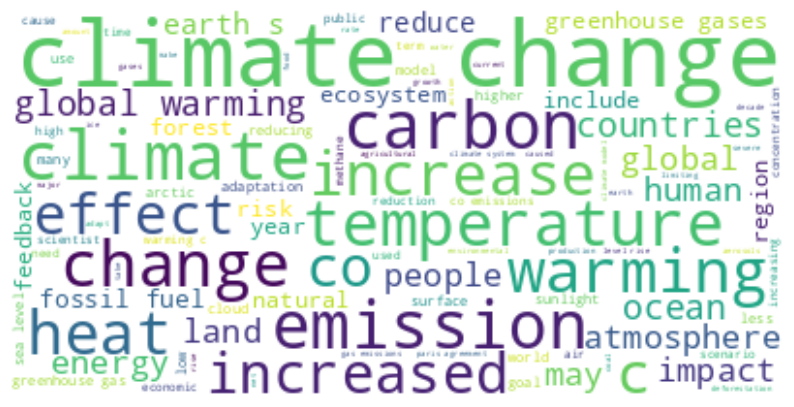

In [ ]:
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#Why did we do all this work?

In [ ]:
# Refetching the data

lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [ ]:
# TODO: Create a list that's formatted how word2vec needs
# A list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
def preprocess_sentence(sentence):
    # Remove punctuation
    sentence = remove_punctuation([sentence])[0]
    # Tokenize words
    words = word_tokenize(sentence)
    return words

def create_word2vec_list(sentences):
    word2vec_list = []
    for sentence in sentences:
        words = preprocess_sentence(sentence)
        word2vec_list.append(words)

    return word2vec_list

tok_sent = create_word2vec_list(sentences)
# TODO: Print the tokenized list of lists
print(tok_sent)

[['common', 'usage', 'climate', 'change', 'describes', 'global', 'warming—the', 'ongoing', 'increase', 'global', 'average', 'temperature—and', 'effects', 'earth', 's', 'climate', 'system'], ['climate', 'change', 'broader', 'sense', 'also', 'includes', 'previous', 'longterm', 'changes', 'earth', 's', 'climate'], ['current', 'rise', 'global', 'average', 'temperature', 'rapid', 'previous', 'changes', 'primarily', 'caused', 'humans', 'burning', 'fossil', 'fuels'], ['fossil', 'fuel', 'use', 'deforestation', 'agricultural', 'industrial', 'practices', 'increase', 'greenhouse', 'gases', 'notably', 'carbon', 'dioxide', 'methane'], ['greenhouse', 'gases', 'absorb', 'heat', 'earth', 'radiates', 'warms', 'sunlight'], ['larger', 'amounts', 'gases', 'trap', 'heat', 'earth', 's', 'lower', 'atmosphere', 'causing', 'global', 'warming'], ['due', 'climate', 'change', 'deserts', 'expanding', 'heat', 'waves', 'wildfires', 'becoming', 'common'], ['increased', 'warming', 'arctic', 'contributed', 'melting', '

<Figure size 640x480 with 0 Axes>

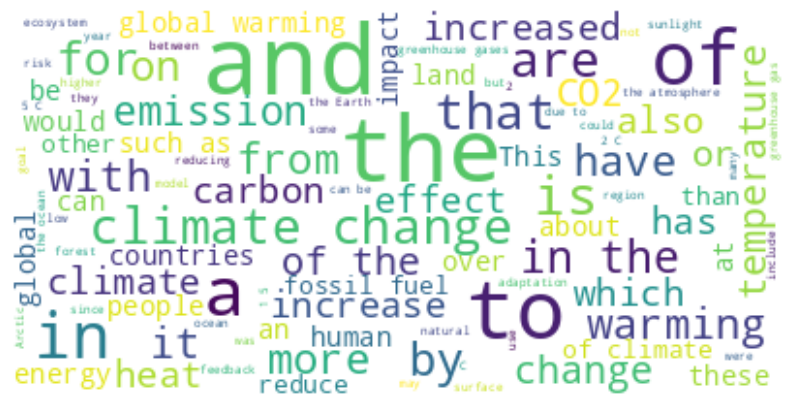

In [ ]:
# Redos the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_text))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed
# TODO: Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

In [ ]:
word_vector = model.wv['greenhouse']
print(word_vector)

[-0.00810092 -0.00380804 -0.00767051  0.00930162 -0.00368259 -0.01453973
 -0.00096264  0.01283493 -0.00720165 -0.00525355 -0.00154649 -0.00857181
 -0.00184046  0.00158207 -0.00193505  0.00640525  0.00588014 -0.01755979
  0.00413312 -0.01505538  0.00309367  0.00519493 -0.00202451 -0.00540922
  0.0055097  -0.00403285 -0.01059441  0.00495303 -0.0073013  -0.00475514
  0.01248765  0.00561336  0.00604198  0.00769419 -0.01189595  0.0109018
  0.00197997  0.00162047 -0.00233646 -0.00408433  0.00429507  0.00301204
 -0.00528956 -0.00490792  0.00501675  0.00075264 -0.00624379  0.00535289
  0.00828487  0.01028065  0.00499156  0.00379323 -0.00223904  0.00879519
  0.00154572 -0.00522049 -0.00115813 -0.00361219 -0.00224606  0.00051719
 -0.00397704  0.00795352  0.01060445 -0.00361836 -0.01202309 -0.00184513
 -0.00132835 -0.00622427 -0.00545438 -0.00048888 -0.0010927   0.00506337
 -0.00011201 -0.01054136  0.00605098 -0.00382     0.00341125 -0.00532925
  0.0033098   0.00307107  0.0004899  -0.00306219 -0.

In [ ]:
# TODO: Finding a vector of a word, but badly
word_vector = model.wv['climate']
print(word_vector)

[-5.20283449e-03  5.17557655e-03  5.16828103e-03  1.01181110e-02
 -1.18405893e-02 -1.89257059e-02  1.12950653e-02  2.06195470e-02
 -1.14302840e-02 -6.23558741e-03  2.69576791e-03 -1.00185005e-02
 -4.68959427e-03  7.34225754e-03 -3.15332320e-03 -5.77683002e-03
  5.68708219e-03 -1.05039328e-02 -1.16440356e-02 -2.20875051e-02
  1.11281732e-02  6.96830964e-03  1.11003686e-02 -4.48289560e-03
  2.46439781e-03 -2.88687111e-03 -5.46985678e-03 -9.64311243e-04
 -1.52727608e-02 -3.43726203e-03 -1.23914040e-03  8.13279825e-04
  1.18627194e-02 -1.00867180e-02 -7.09370663e-03  7.22916471e-03
  7.16087548e-03 -9.69542284e-03 -6.17869757e-03 -1.79890357e-02
 -9.49352048e-03 -4.33157620e-05 -1.18191829e-02 -4.79514711e-03
  7.88476225e-03 -2.83582346e-03 -1.23363081e-02  8.97922367e-03
  1.09176738e-02  1.26652746e-02 -4.42875316e-03 -2.10811547e-03
 -5.28104650e-03  1.54881424e-03  4.76259226e-03  2.59216322e-04
  8.12828634e-03 -8.35245941e-03 -1.46132093e-02  1.13229789e-02
 -3.01761855e-03  1.84641